In [1]:
print('om namo narayana')

om namo narayana


In [313]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import random

In [326]:
#f = 2 * x
input_data = np.random.randn(10000, 1)*10
error = 1
output_data = input_data* 2
for i in range(100):
    add = np.array(np.random.randint(1, 100000, error)/10000)
    f = np.random.randint(0, 3) - 1
    temp = [np.random.randint(1, 1000, error)]
    input_data[temp] = input_data[temp] + error*f

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


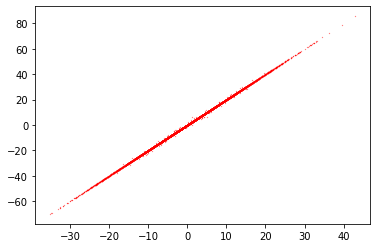

In [327]:
plt.plot(input_data.flatten(), output_data.flatten(), 'ro', markersize = 0.2)

In [328]:
class call(keras.callbacks.Callback):
    def end_of_epoch(self, epochs, log = {}):
        if(log.get('loss') < 0.2):
            print('error < 0.2')
            print('***Congrats the model has been succesfully trained***')
            self.model.stop_training = True

In [329]:
call = call()
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation = 'linear'))
keras.optimizers.SGD(lr = 0.001, momentum = 1, decay = 0.0, nesterov = True)
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [330]:
model.fit(input_data, output_data, epochs = 100, callbacks = [call])
weight = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print("weight: ", weight, " bias: ", bias)

Epoch 1/100
10000/10000 [==============================] - 0s 46us/sample - loss: 2.4826
Epoch 2/100
10000/10000 [==============================] - 0s 18us/sample - loss: 0.1112
Epoch 3/100
10000/10000 [==============================] - 0s 18us/sample - loss: 0.1256
Epoch 4/100
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0993
Epoch 5/100
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0661
Epoch 6/100
10000/10000 [==============================] - 0s 18us/sample - loss: 0.1244
Epoch 7/100
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0939
Epoch 8/100
10000/10000 [==============================] - 0s 18us/sample - loss: 0.4210
Epoch 9/100
10000/10000 [==============================] - 0s 19us/sample - loss: 0.4070
Epoch 10/100
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0864
Epoch 11/100
10000/10000 [==============================] - 0s 19us/sample - loss: 0.1329
Epoch 12/100
10000/

10000/10000 [==============================] - 0s 20us/sample - loss: 0.0834
Epoch 93/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1570
Epoch 94/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1093
Epoch 95/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1102
Epoch 96/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1872
Epoch 97/100
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0861
Epoch 98/100
10000/10000 [==============================] - 0s 19us/sample - loss: 0.9903
Epoch 99/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0702
Epoch 100/100
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0752
weight:  [[1.996736]]  bias:  [0.00634041]


In [311]:
model.evaluate(np.arange(1, 100)/10, np.arange(1, 100)*2/10)
print(model.predict(np.arange(1, 10)/10))

99/99 [==============================] - 0s 1ms/sample - loss: 2.2269e-04
[[0.22637504]
 [0.42609313]
 [0.6258113 ]
 [0.82552934]
 [1.0252473 ]
 [1.2249656 ]
 [1.4246836 ]
 [1.6244017 ]
 [1.8241197 ]]


In [322]:
#f = 3 * x + 4 * y
input_data = np.random.randn(10000, 2)
output_data = np.dot([3, 4], input_data.T)
error = 1
for i in range(1):
    add = np.array(np.random.randint(1, 10, error)/100000)
    temp = [np.random.randint(1, 10000, error)]
    input_data = input_data.reshape(2*len(input_data), 1)
    input_data[temp] = input_data[temp] + error
    input_data = input_data.reshape(10000 , 2)

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


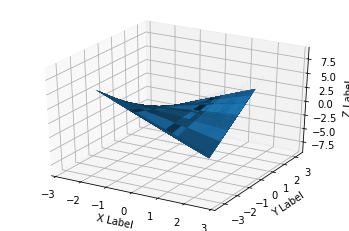

In [325]:
def f(x, y):
    return x*y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = input_data.T[0][:1000]
y = input_data.T[1][:1000]
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [239]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation = 'linear'))
keras.optimizers.SGD(lr = 0.1, nesterov = True, momentum = 0.5, decay = 0.0)
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [240]:
weight = []
bias = []
model.fit(input_data, output_data, epochs = 100, callbacks = [call])
weight.append(model.layers[0].get_weights()[0])
bias.append(model.layers[0].get_weights()[1])
print("weigts:", weight, " bias: ", bias)


Epoch 1/100
10000/10000 [==============================] - 0s 38us/sample - loss: 9.6352
Epoch 2/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.6049
Epoch 3/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.0873
Epoch 4/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.3020
Epoch 5/100
10000/10000 [==============================] - ETA: 0s - loss: 7.391 - 0s 18us/sample - loss: 8.0033
Epoch 6/100
10000/10000 [==============================] - 0s 19us/sample - loss: 7.8459
Epoch 7/100
10000/10000 [==============================] - 0s 20us/sample - loss: 8.3811
Epoch 8/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.1358
Epoch 9/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.1688
Epoch 10/100
10000/10000 [==============================] - 0s 19us/sample - loss: 7.8389
Epoch 11/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.

In [241]:
keras.optimizers.SGD(lr = 0.01, nesterov = True, momentum = 0.5, decay = 0.0)
model.compile(optimizer = 'sgd', loss = 'mean_squared_error') 

In [242]:
model.fit(input_data, output_data, epochs = 100, callbacks = [call])
weight.append(model.layers[0].get_weights()[0])
bias.append(model.layers[0].get_weights()[1])
print("weigts:", weight, " bias: ", bias)

Epoch 1/100
10000/10000 [==============================] - 0s 38us/sample - loss: 7.9941
Epoch 2/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.4145
Epoch 3/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.4139
Epoch 4/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.5672
Epoch 5/100
10000/10000 [==============================] - 0s 21us/sample - loss: 8.4617
Epoch 6/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.2197
Epoch 7/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.4033
Epoch 8/100
10000/10000 [==============================] - 0s 21us/sample - loss: 8.1346
Epoch 9/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.2485
Epoch 10/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.3480
Epoch 11/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.3219
Epoch 12/100
10000/

In [244]:
#with momentum  = 1
keras.optimizers.SGD(lr = 0.01, nesterov = True, momentum = 1, decay = 0.0)
model.compile(optimizer = 'sgd', loss = 'mean_squared_error') 

In [245]:
model.fit(input_data, output_data, epochs = 100, callbacks = [call], verbose = 0)
weight.append(model.layers[0].get_weights()[0])
bias.append(model.layers[0].get_weights()[1])
print("weigts:", weight, " bias: ", bias)

Epoch 1/100
10000/10000 [==============================] - 0s 39us/sample - loss: 8.3326
Epoch 2/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.4689
Epoch 3/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.6974
Epoch 4/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.3591
Epoch 5/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.2916
Epoch 6/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.2405
Epoch 7/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.1950
Epoch 8/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.4805
Epoch 9/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.3692
Epoch 10/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.1800
Epoch 11/100
10000/10000 [==============================] - 0s 20us/sample - loss: 8.9301
Epoch 12/100
10000/

10000/10000 [==============================] - 0s 21us/sample - loss: 8.2471
Epoch 93/100
10000/10000 [==============================] - 0s 20us/sample - loss: 8.5270
Epoch 94/100
10000/10000 [==============================] - 0s 20us/sample - loss: 8.5514
Epoch 95/100
10000/10000 [==============================] - 0s 20us/sample - loss: 7.8346
Epoch 96/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.3595
Epoch 97/100
10000/10000 [==============================] - 0s 20us/sample - loss: 8.3291
Epoch 98/100
10000/10000 [==============================] - 0s 19us/sample - loss: 8.1144
Epoch 99/100
10000/10000 [==============================] - 0s 21us/sample - loss: 8.1148
Epoch 100/100
10000/10000 [==============================] - 0s 20us/sample - loss: 7.9753
weigts: [array([[2.3698227],
       [2.835358 ]], dtype=float32), array([[2.231795 ],
       [2.5110655]], dtype=float32), array([[2.2469099],
       [2.1781561]], dtype=float32)]  bias:  [array([-0.055

In [246]:
#with momentum = 0
keras.optimizers.SGD(lr = 0.01, nesterov = True, momentum = 0, decay = 0.0)
model.compile(optimizer = 'sgd', loss = 'mean_squared_error') 

In [247]:
model.fit(input_data, output_data, epochs = 100, callbacks = [call], verbose = 0)
weight.append(model.layers[0].get_weights()[0])
bias.append(model.layers[0].get_weights()[1])
print("weigts:", weight, " bias: ", bias)

weigts: [array([[2.3698227],
       [2.835358 ]], dtype=float32), array([[2.231795 ],
       [2.5110655]], dtype=float32), array([[2.2469099],
       [2.1781561]], dtype=float32), array([[2.580671 ],
       [2.0984974]], dtype=float32)]  bias:  [array([-0.05500467], dtype=float32), array([-0.10474615], dtype=float32), array([-0.05447342], dtype=float32), array([-0.05690658], dtype=float32)]


In [248]:
#with no stochastic error
input_data = np.random.randn(100, 2)
output_data = np.dot([3, 4], input_data.T)

In [249]:
model.fit(input_data, output_data, epochs = 100, callbacks = [call], verbose = 0)
weight.append(model.layers[0].get_weights()[0])
bias.append(model.layers[0].get_weights()[1])
print("weigts:", weight, " bias: ", bias)

weigts: [array([[2.3698227],
       [2.835358 ]], dtype=float32), array([[2.231795 ],
       [2.5110655]], dtype=float32), array([[2.2469099],
       [2.1781561]], dtype=float32), array([[2.580671 ],
       [2.0984974]], dtype=float32), array([[2.9999979],
       [3.9999979]], dtype=float32)]  bias:  [array([-0.05500467], dtype=float32), array([-0.10474615], dtype=float32), array([-0.05447342], dtype=float32), array([-0.05690658], dtype=float32), array([-4.680837e-08], dtype=float32)]
